<a href="https://colab.research.google.com/github/acubillosunal/UBM-DEEP-LEARNING-1/blob/main/U2.04%20-%20Loss%20functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras almancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [31]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/acubillosunal/UBM-DEEP-LEARNING-1/main/init.py
import init; init.init(force_download=False); 

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
%matplotlib inline

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model

from IPython.display import Image

    
tf.__version__

'2.15.0'

## **Funciones de perdida (Loss functions)**

#### **¿Qué es una función de pérdida?**

La función de pérdida es la medida de cuánto difiere el valor predicho de un algoritmo del valor real. También se utiliza para cuantificar la pérdida de probabilidad al predecir un resultado.

El tipo más común de función de pérdida en el modelado estadístico se llama "regresión logística binaria", que supone que la variable de salida sólo puede tomar uno de dos valores.

Las funciones de pérdida generalmente se usan para problemas de optimización en el aprendizaje automático, donde ayudan a determinar cuántos datos de entrenamiento deben modificarse o agregarse para mejorar los modelos predictivos.

Una función de pérdida es una medida de qué tan bien un modelo predice la etiqueta correcta para cada entrada, en función de sus ponderaciones y parámetros de sesgo. Existen diferentes tipos de funciones de pérdida, dependiendo de lo que esté intentando optimizar.

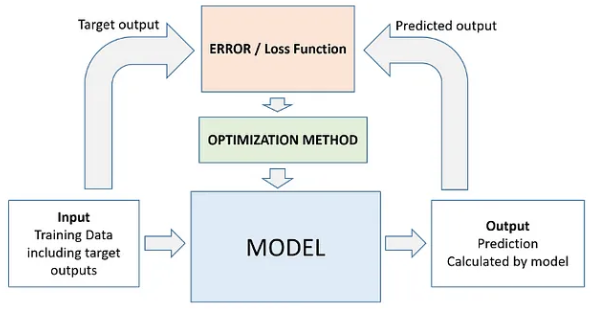

In [33]:
Image(filename='local/imgs/step_loss_function.png')

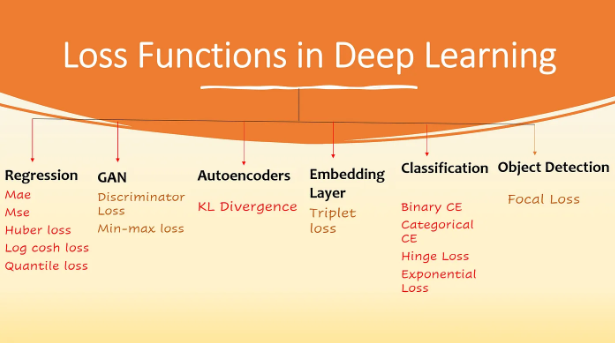

In [35]:
Image(filename='local/imgs/loss_function_DL.png')

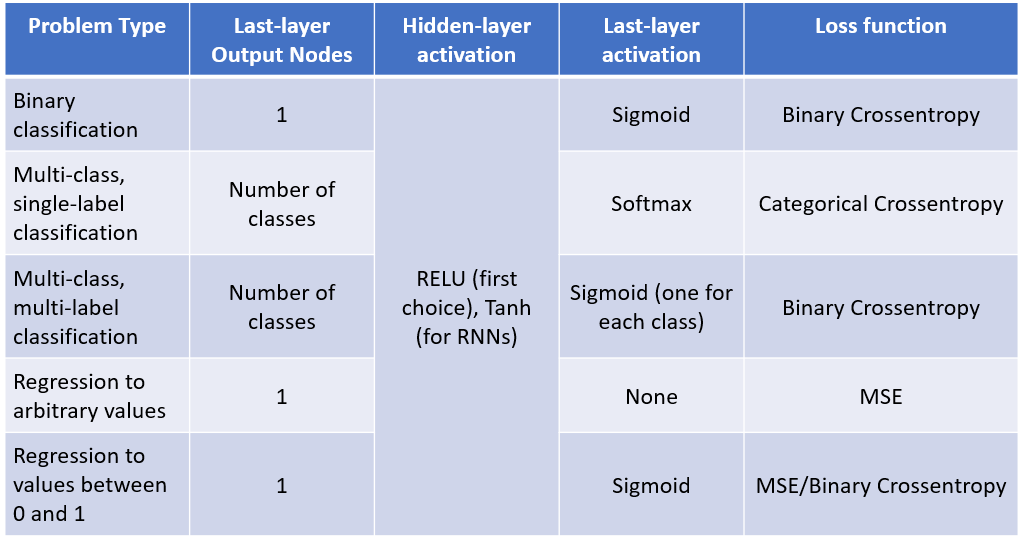

In [34]:
Image(filename='local/imgs/use_loss_function.png')

### **Loss Functions en Regresión**

#### **1. Mean Squared Error (MSE)**
Está dado por la media de la diferencia al cuadrado entre el resultado real y el previsto. También se refiere a una pérdida de L2.

$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2
$$

Ventajas

* Muy intuitivo y fácil de entender (interpretable)
* Fácilmente diferenciable (debido a la presencia del término al cuadrado)
* Tiene una curva convexa: un mínimo global y local.ç

Contras
* Aumenta el error debido al término al cuadrado.
* Los valores atípicos reciben una fuerte penalización, no son resistentes a los valores atípicos
* La unidad de error también se eleva al cuadrado (por ejemplo: 5lpa se convierte en 5 lpa al cuadrado)
* Solo se puede aplicar cuando la (última) capa de salida es lineal.

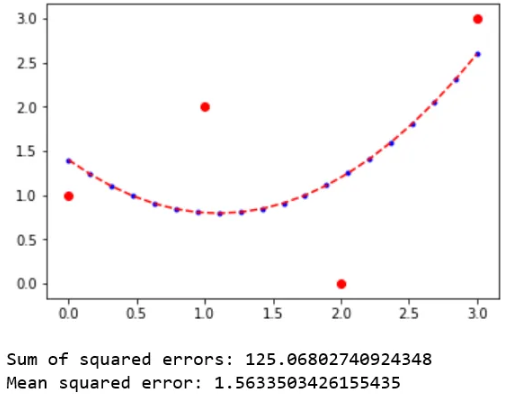

In [36]:
Image(filename='local/imgs/MSE_loss_function.png')

In [45]:
import tensorflow as tf

# True values
y_true = [3, -0.5, 2, 7]

# Model's predictions
y_pred = [2.5, 0.0, 2, 8]

# Mean Squared Error calculation
mse = tf.keras.losses.MeanSquaredError()
loss = mse(y_true, y_pred)
print("Mean Squared Error:", loss.numpy())

Mean Squared Error: 0.375


#### **2. Error absoluto medio (MAE)**

Está dado por el promedio de las diferencias absolutas entre los resultados reales y previstos. También se refiere a una pérdida de L2.

$$
\text{MAE} = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y_i}|
$$

Ventajas

* Intuitivo y fácil de entender.
* La unidad sigue siendo la misma que las funciones involucradas.
* Robusto ante valores atípicos: siempre se prefiere cuando los datos tienen valores atípicos

Contras

* No es fácilmente diferenciable: computacionalmente complejo
* Debido a esto, se convierte en una elección difícil para algoritmos como el descenso de gradiente, que implican en gran medida la diferenciación.
* Es menos estable que MSE, ya que se ocupa de diferencias, un pequeño cambio horizontal puede provocar grandes saltos en la línea de regresión.


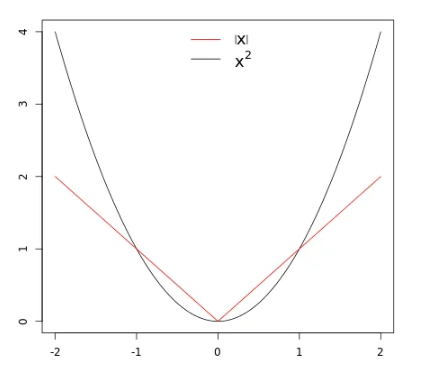

In [37]:
Image(filename='local/imgs/val_abs_loss_function.png')

In [51]:
import tensorflow as tf

# True values
y_true = [3, -0.5, 2, 7]

# Model's predictions
y_pred = [2.5, 1.0, 2, 8]

# Mean Squared Error calculation
mse = tf.keras.losses.MeanAbsoluteError()
loss = mse(y_true, y_pred)
print("Mean Absolute Error:", loss.numpy())

Mean Absolute Error: 0.75


#### **3. Pérdida de Huber (indicada por delta)**
Combina lo mejor de ambos mundos: robustez de la pérdida L1 y estabilidad de la pérdida L2.


$$
L_{\delta}(y, f(x)) =
\begin{cases}
\frac{1}{2}(y-f(x))^2, & \text{for } |y - f(x)| \leq \delta, \\
\delta|y-f(x)| - \frac{1}{2}\delta)^2, & \text{e.o.c}.
\end{cases}
$$

*Nota: En caso de que tengamos valores atípicos en nuestros datos, la función de pérdida anterior se vuelve lineal: el segundo término y delta se vuelven enormes. Por otro lado, cuando no hay valores atípicos, la función toma forma de ecuación cuadrática (primer término) y delta se vuelve cero.*


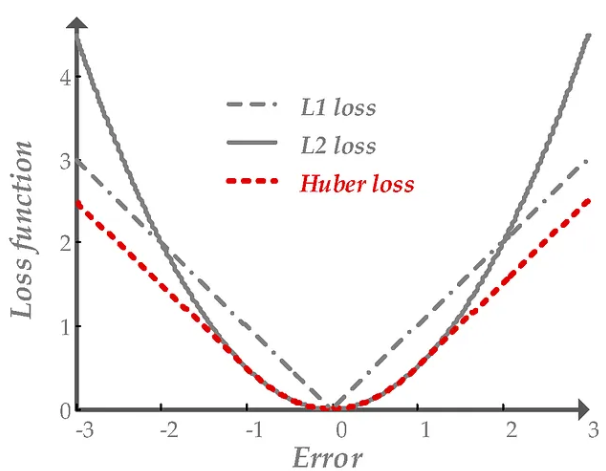

In [39]:
Image(filename='local/imgs/huber_loss_function.png')

In [55]:
import tensorflow as tf

# True values
y_true = [3, -0.5, 2, 7]

# Model's predictions
y_pred = [2.5, 1.0, 2, 8]

# Mean Squared Error calculation
mse = tf.keras.losses.Huber(delta=1.0, reduction="sum_over_batch_size", name="huber_loss")
loss = mse(y_true, y_pred)
print("Huber Loss:", loss.numpy())

Huber Loss: 0.40625


### **Loss Functions en Classificación**

#### **1. Entropía cruzada binaria (Binary crossentropy)**
La entropía como término se utiliza a menudo para medir la aleatoriedad en una función/objeto determinado.

Binary CE, como su nombre indica, se refiere a la diferencia de aleatoriedad entre dos características (o variables) dadas. El término se hace cada vez más pequeño a medida que disminuye esta diferencia.

Sabemos que en la clasificación binaria, el resultado puede ser 0 o 1. Entonces, si yi se convierte en 1, automáticamente implicará que 1-yi se convierte en cero.

$$
\begin{equation}
L = -\dfrac{1}{m}(\sum_{i=1}^{m} \left( y_i\log(\hat{y_i}) + (1-y_i) \cdot \log(1 - \hat{y_i})) \right)
\end{equation}
$$

Ventajas

* Pérdida más utilizada para problemas de clasificación binaria
* Es fácilmente diferenciable

Contras

* Menos intuitivo y puede tener muchos mínimos locales.
* Al aplicar esto, la función de activación en la capa de salida debe ser SIGMOIDE.

In [47]:

import tensorflow as tf

# True labels (0 or 1)
y_true = [1, 0, 1, 1]

# Model's predictions (probabilities)
y_pred = [0.9, 0.2, 0.8, 0.95]

# Binary Crossentropy calculation
bce = tf.keras.losses.BinaryCrossentropy()
loss = bce(y_true, y_pred)
print("Binary Crossentropy:", loss.numpy())

Binary Crossentropy: 0.1507351


#### **2. Entropía cruzada categórica (Categorical cross entropy)**
Esto se hace evidente cuando tenemos una clasificación multiclase: el número de clases pasa a ser superior a 2.

$$
\text{L} = -\dfrac{1}{m}\sum_{i=1}^{m} y_i\log(\hat{y_i})
$$

Ventajas

* Adecuado para clasificación Softmax en la capa de salida.
* Preferido cuando tenemos menos número de clases.
* Aquí se utiliza una codificación activa para las clases.

Contras

* Más lento en funcionamiento

* No es adecuado cuando el número de clases es enorme (debido a que se utiliza una codificación activa en la columna de destino): genera funciones escasas.

Para una gran cantidad de clases involucradas, utilizamos la entropía cruzada categórica, ya que la codificación de enteros (o codificación numérica) se utiliza en la columna de destino.

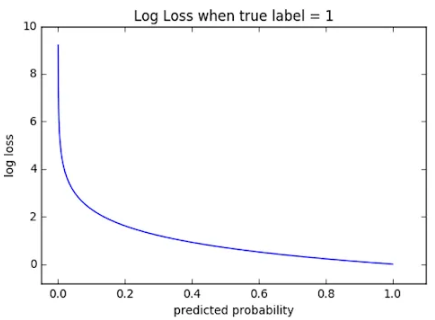

In [41]:
Image(filename='local/imgs/categorical_cross_entropy_loss_function.png')

In [46]:
import tensorflow as tf

# True labels (one-hot encoding)
y_true = [[0, 1, 0], [1, 0, 0], [0, 0, 1]]

# Model's predictions (probabilities)
y_pred = [[0.2, 0.7, 0.1], [0.9, 0.1, 0.0], [0.1, 0.3, 0.6]]

# Categorical Crossentropy calculation
cce = tf.keras.losses.CategoricalCrossentropy()
loss = cce(y_true, y_pred)
print("Categorical Crossentropy:", loss.numpy())

Categorical Crossentropy: 0.32428703


*Nota: Es recomendable utilizar entropía categórica dispersa **(Sparse Categorical Entropy, SCE)** en caso de que esté involucrada una gran cantidad de clases. Es sólo ligeramente diferente a la entropía cruzada categórica en términos de funcionamiento interno. Utiliza codificación entera en lugar de codificación activa. Esto evita funciones escasas y acelera el trabajo.

#### **Entropía categórica dispersa (Sparse Categorical Entropy, SCE)**

La entropía cruzada categórica dispersa es similar a la entropía cruzada categórica, pero se utiliza cuando las etiquetas verdaderas se representan como números enteros en lugar de codificación one-hot.

$$
\text{SCE} = -\sum_{i=1}^{C} \log(\hat{y_i}[y_i])
$$

In [48]:
import tensorflow as tf

# True labels (integer values)
y_true = [1, 0, 2]

# Model's predictions (probabilities)
y_pred = [[0.2, 0.7, 0.1], [0.9, 0.1, 0.0], [0.1, 0.3, 0.6]]

# Sparse Categorical Crossentropy calculation
sparse_cce = tf.keras.losses.SparseCategoricalCrossentropy()
loss = sparse_cce(y_true, y_pred)
print("Sparse Categorical Crossentropy:", loss.numpy())

Sparse Categorical Crossentropy: 0.3242871


#### **3. Hinge Loss**

Otra función de pérdida comúnmente utilizada para problemas de clasificación, especialmente diseñada para el algoritmo de clasificación SVM (máquinas de vectores de soporte) (con etiquetas como -1 y 1, no 0 y 1). Facilita encontrar el máximo margen de separación, desde los hiperplanos hasta las respectivas clases.

$$
\text{L} = \max(0, 1-yf(x))
$$

Penaliza las predicciones incorrectas realizadas por el algoritmo.

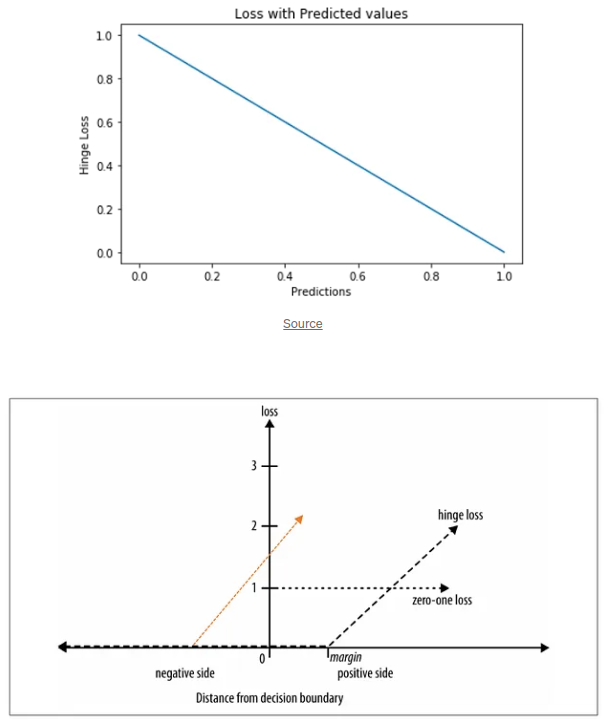

In [42]:
Image(filename='local/imgs/hinge_loss_function_1.png')

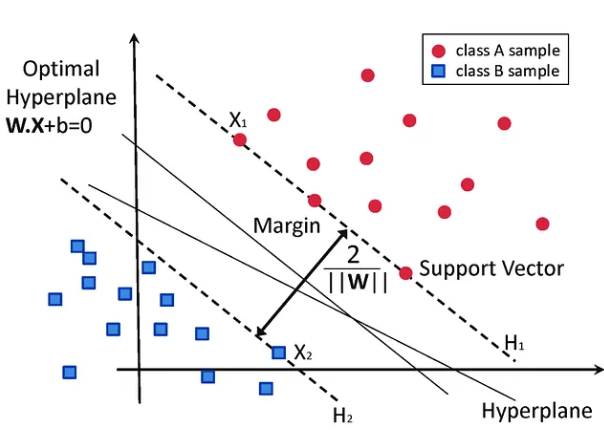

In [44]:
Image(filename='local/imgs/hinge_loss_function_2.png')

In [54]:
import tensorflow as tf

# True labels (integer values)
y_true = [1, 0, 2]

# Model's predictions (probabilities)
y_pred = [[0.2, 0.7, 0.1], [0.9, 0.1, 0.0], [0.1, 0.3, 0.6]]

# Sparse Categorical Crossentropy calculation
sparse_cce = tf.keras.losses.Hinge(reduction="sum_over_batch_size", name="hinge")
loss = sparse_cce(y_true, y_pred)
print("Hinge Loss:", loss.numpy())

Hinge Loss: 0.7333333


Para más detalle consultar la dpocumentación de Keras

<a href="https://keras.io/api/losses/">Documentación de Keras</a>


## **Funciones de perdida en tensorflow**

### **Un dataset de muestra**

Una tarea de regresión muy simple, con una entrada y una salida.

In [3]:
d = pd.read_csv("local/data/trilotropicos.csv")
y = d.densidad_escamas.values.astype(np.float32)
X = np.r_[[d.longitud.values]].T.astype(np.float32)
X.shape, y.shape

((150, 1), (150,))

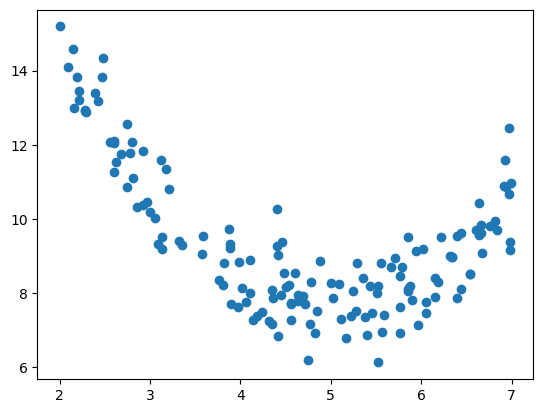

In [4]:
plt.scatter(X, y)

### **Regresión lineal con la API sequential de tensorflow**

Observa cómo implementamos un modelo estándar de **Regresión lineal** con el modelo **Secuencial** de Tensorflow.

In [5]:

def get_model_sequential(loss):
    model = Sequential()
    model.add(Dense(1, input_shape=(X.shape[-1],), activation="linear"))
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss=loss)
    return model  


In [6]:
model = get_model_sequential(loss="mse")
model.fit(X,y, epochs=400, batch_size=16, verbose=0);
model.get_weights()

2024-03-15 15:58:09.224242: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-15 15:58:09.226482: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


[array([[-0.72836417]], dtype=float32), array([12.652164], dtype=float32)]

y siempre podemos llamar al modelo entrenado en cualquier dato de entrada para hacer nuevas predicciones.

In [7]:
model(np.r_[[[5],[6],[7]]]).numpy()

array([[9.010344],
       [8.28198 ],
       [7.553615]], dtype=float32)

In [8]:
model.predict(np.r_[[[5],[6],[7]]])

1/1 [==============================] - 0s 110ms/step


array([[9.010344],
       [8.28198 ],
       [7.553615]], dtype=float32)

los pesos obtenidos son bastante similares con la implementación estándar `scikit-learn`

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)
lr.coef_, lr.intercept_

(array([-0.71805906], dtype=float32), 12.689999)

ten en cuenta que estamos usando la función de pérdida **Error cuadrático medio predefinido** en Tensorflow

In [10]:
model = get_model_sequential(loss=tf.keras.losses.MSE)
model.fit(X,y, epochs=400, batch_size=16, verbose=0);
model.get_weights()

[array([[-0.68422794]], dtype=float32), array([12.662324], dtype=float32)]

In [11]:
model(np.r_[[[5],[6],[7]]]).numpy()

array([[9.241184 ],
       [8.556956 ],
       [7.8727283]], dtype=float32)

Podríamos haberlo implementado nosotros mismos. Recuerde que **DEBEMOS USAR** operaciones de Tensorflow.

In [12]:
def mse_loss(y_true, y_pred):
    return tf.reduce_mean((y_true-y_pred)**2, axis=-1)

In [13]:
model = get_model_sequential(loss=mse_loss)
model.fit(X,y, epochs=400, batch_size=16, verbose=0);
model.get_weights()

[array([[-0.6247816]], dtype=float32), array([12.66438], dtype=float32)]

In [14]:
model(np.r_[[[5],[6],[7]]]).numpy()

array([[9.540472],
       [8.91569 ],
       [8.290909]], dtype=float32)

Incluso puedes llamar explícitamente a las funciones y comprobar cómo funcionan.

In [15]:
y_true  = np.random.random(size=5)
y_preds = np.random.random(size=y_true.shape)
y_true, y_preds

(array([0.64213127, 0.25032508, 0.44274043, 0.18758995, 0.6019145 ]),
 array([0.35115559, 0.7911831 , 0.55865166, 0.80393697, 0.82232376]))

In [16]:
# numpy MSE
np.mean((y_true-y_preds)**2)

0.1638187074898702

In [17]:
# tf.keras MSE
tf.keras.losses.MSE(y_true, y_preds)

<tf.Tensor: shape=(), dtype=float64, numpy=0.1638187074898702>

In [18]:
# our implementation
mse_loss(y_true, y_preds)

<tf.Tensor: shape=(), dtype=float64, numpy=0.1638187074898702>

### Linear regression with Tensorflow Functional API

We can use the same mechanism with the Functional API

In [19]:
def get_model_functional_1(loss):
    inputs = Input(shape=(X.shape[-1],), name="input")
    outputs = Dense(1, activation='linear', name="output")(inputs)
    model = Model([inputs], [outputs])    
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss=loss)
    return model  


In [20]:

model = get_model_functional_1(loss="mse")
model.fit(X,y, epochs=400, batch_size=16, verbose=0);
model.get_weights()

[array([[-0.755979]], dtype=float32), array([12.697947], dtype=float32)]

In [21]:
model(np.r_[[[5],[6],[7]]]).numpy()

array([[8.918052 ],
       [8.162073 ],
       [7.4060936]], dtype=float32)

In [22]:
model = get_model_functional_1(loss=tf.keras.losses.MSE)
model.fit(X,y, epochs=400, batch_size=16, verbose=0);
model.get_weights()

[array([[-0.79805857]], dtype=float32), array([12.645336], dtype=float32)]

In [23]:
model(np.r_[[[5],[6],[7]]]).numpy()

array([[8.655044 ],
       [7.8569846],
       [7.058926 ]], dtype=float32)

In [24]:
model = get_model_functional_1(loss=mse_loss)
model.fit(X,y, epochs=400, batch_size=16, verbose=0);
model.get_weights()

[array([[-0.74671775]], dtype=float32), array([12.658468], dtype=float32)]

In [25]:
model(np.r_[[[5],[6],[7]]]).numpy()

array([[8.924879],
       [8.178162],
       [7.431444]], dtype=float32)

Sin embargo, cuando utilizamos la API funcional tenemos más flexibilidad. El siguiente código es **una forma ortodoxa**
de definir un modelo supervisado, pero será útil cuando se trate de codificadores automáticos más adelante para usarlos de manera no supervisada.

Observe los siguientes aspectos:

- **DEFINIMOS** nuestro modelo para que tenga dos entradas: $X$ (en la capa `inputs`) e $y$ (en la capa `targets`).
- **DEFINIMOS** nuestro modelo para que tenga una salida en la capa "salidas" como antes. Observe que la nueva capa "objetivos" no participa en la producción de este resultado.
- **INTEGRAMOS** la pérdida en el modelo usando directamente **las capas del modelo** y el método `model.add_loss`.
- **NO** necesitamos especificar la "pérdida" al compilar el modelo.
- La capa "objetivos" solo participa en el cálculo de la "pérdida" y, por lo tanto, solo se usa durante el **ENTRENAMIENTO**, no en la inferencia.

In [26]:
def get_model_functional_2():
    inputs  = Input(shape=(X.shape[-1],), name="inputs")
    targets = Input(shape=(1,), name="targets")
    
    outputs = Dense(1, activation='linear', name="outputs")(inputs)
    model = Model([inputs, targets], [outputs])    
    
    loss = tf.reduce_mean((outputs-targets)**2)
    model.add_loss(loss)

    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01))
    return model  


observa como debido a esta nueva arquitectura la llamada al método `.fit` ahora cambia, aunque los resultados son los mismos.

In [27]:
model = get_model_functional_2()
model.fit([X,y], epochs=400, batch_size=16, verbose=0);
model.get_weights()

[array([[-0.7286618]], dtype=float32), array([12.667883], dtype=float32)]

**SIN EMBARGO** al llamar al modelo (inferencia) **DEBEMOS** proporcionar tanto $X$ como $y$, incluso si sabemos que $y$ no se usará (solo se usa durante el entrenamiento). Observe cómo la siguiente llamada siempre produce el mismo resultado independientemente de los valores de $y$.

Esto es **INCONVENIENTE** para un modelo supervisado, pero ilustra la flexibilidad de la API funcional.

In [28]:
X = np.r_[[[5],[6],[7]]]
y = np.random.random(size=(3,1))
print (y)
model([X, y]).numpy()

[[0.49563529]
 [0.72228431]
 [0.19481951]]


array([[9.024574 ],
       [8.295912 ],
       [7.5672503]], dtype=float32)